In [ ]:
#Ejercicio 1
#pràctica del notebook a GitHub "03 EXAMINING DATA" 

In [6]:
import pandas as pd


#Los datos que vamos a trabajar hace referencia a una base de datos de películas, que se han ido publicando
#desde 1920 hasta 2020 y donde podemos encontrar sus respectivos generos.Son variables INT, en lo que se refiere a los año, y
#las restas son variables de texto.

# Definimos las columnas
column_names = ['ID', 'title', 'genre']

# Cargamos la ruta de acceso
df = pd.read_csv(r"C:\Users\Dayan Gonzalez\Downloads\movies.dat", sep='::', engine='python', names=column_names, encoding='latin-1', header=None)

# Split the 'genre' column into a list
df['genre'] = df['genre'].str.split('|')

# Exttraemos el año de la columna "title" mediante una expresión
df['year'] = df['title'].str.extract(r'\((\d{4})\)', expand=False)

# Eliminamos el año de la columna título
df['title'] = df['title'].str.replace(r'\(\d{4}\)', '', regex=True)

# Los mismo hacemos con los paréntesis de la columna año
df['year'] = df['year'].str.strip('()')

# Convertimos año en un número entero
df['year'] = df['year'].astype(int)

# Reordenamos la columna
df = df[['title', 'year', 'genre']]

# Seleccionamos solo el primer género de la lista
df['genre'] = df['genre'].apply(lambda x: x[0] if x else None)

# Eliminamos las filas con género nulo
df = df.dropna(subset=['genre'])

# Imprimimos el resultado
print(df.head())


                          title  year      genre
0                    Toy Story   1995  Animation
1                      Jumanji   1995  Adventure
2             Grumpier Old Men   1995     Comedy
3            Waiting to Exhale   1995     Comedy
4  Father of the Bride Part II   1995     Comedy


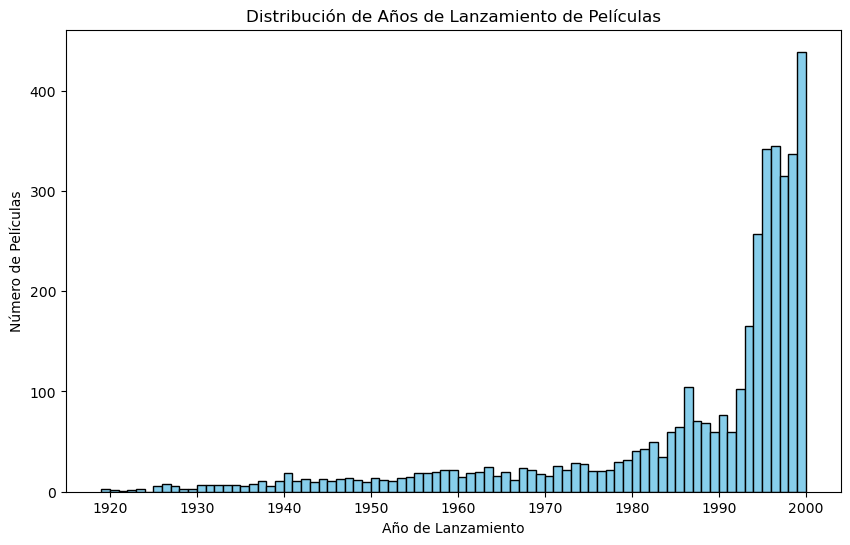

In [34]:
#Ejercico 3
import pandas as pd
import matplotlib.pyplot as plt

#En esta visualización de datos hemos optado por un histograma, ya que es bastante representativo para mostrar
#la distribución de una variable a lo largo del tiempo, en este caso las películas, y ver la evolución de este. 
#Observamos que a lo largo del períod se han ido incremnentado ligeramente la producción y lanzamientos, y en especial
#vemos un incremento signifativo en la década de los 90'.

# cargamos el conjunto de datos
column_names = ['ID', 'title', 'genre']
df = pd.read_csv(r"C:\Users\Dayan Gonzalez\Downloads\movies.dat", sep='::', engine='python', names=column_names, encoding='latin-1', header=None)

# Extrae el año de la columna 'title' utilizando expresiones regulares
df['year'] = df['title'].str.extract(r'\((\d{4})\)')

# Convierte el año a tipo numérico
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Crear un histograma de la cantidad de películas desde 1920 hasta 2000
plt.figure(figsize=(10, 6))
plt.hist(df['year'].dropna().astype(int), bins=range(df['year'].min(), df['year'].max() + 1), color='skyblue', edgecolor='black')
plt.title('Distribución de Años de Lanzamiento de Películas')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Películas')
plt.show()
